In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('countrycluster.csv')

In [3]:
dataset

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


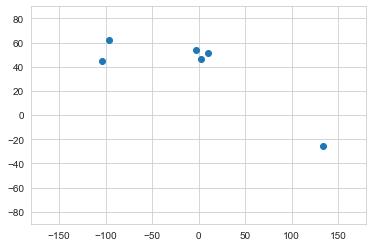

In [4]:
plt.scatter(dataset['Longitude'],dataset['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [5]:
x = dataset.iloc[:,[1,2]].values

In [6]:
x

array([[  44.97, -103.77],
       [  62.4 ,  -96.8 ],
       [  46.75,    2.4 ],
       [  54.01,   -2.53],
       [  51.15,   10.4 ],
       [ -25.45,  133.11]])

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmens = KMeans(3)

In [9]:
kmens.fit(x)

KMeans(n_clusters=3)

In [10]:
identified_clusters = kmens.fit_predict(x)

In [11]:
identified_clusters

array([0, 0, 1, 1, 1, 2])

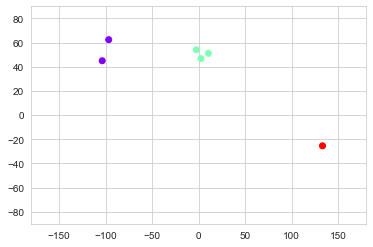

In [12]:
plt.scatter(dataset['Longitude'],dataset['Latitude'],c=identified_clusters,cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [13]:
wcss = []
for i in range(1,7):
    kmens = KMeans(i)
    kmens = kmens.fit(x)
    wcss_iter = kmens.inertia_
    wcss.append(wcss_iter)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

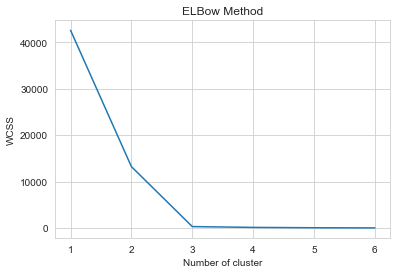

In [15]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)
plt.title('ELBow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [16]:
x

array([[  44.97, -103.77],
       [  62.4 ,  -96.8 ],
       [  46.75,    2.4 ],
       [  54.01,   -2.53],
       [  51.15,   10.4 ],
       [ -25.45,  133.11]])

In [17]:
# MeanShift
from sklearn.cluster import MeanShift

In [18]:
ms = MeanShift()

In [19]:
ms.fit(x)

MeanShift()

In [20]:
identified_clusters_ms = ms.fit_predict(x)

In [23]:
identified_clusters_ms

array([4, 0, 3, 1, 2, 5], dtype=int64)

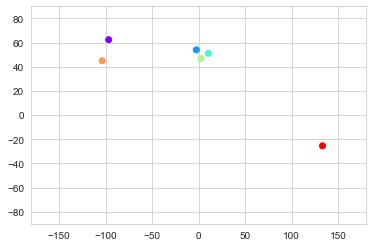

In [22]:
plt.scatter(dataset['Longitude'],dataset['Latitude'],c=identified_clusters_ms,cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()